# Comparison of Different Types of Neural Networks
In this notebook, we'll explore and compare various types of neural networks, including dense neural networks, convolutional neural networks (CNN), recurrent neural networks (RNN), residual neural networks (ResNet), autoencoders, transformers, adversarial learning, and reinforcement learning.

## 1. Dense Neural Network (DNN)

### Description
Dense Neural Networks, also known as fully connected networks, consist of layers where each neuron is connected to every neuron in the previous and subsequent layers. They are simple yet powerful for many types of tasks.

### Type of Data
DNNs are best suited for tabular data or structured data where features are independent and don't exhibit any spatial or temporal dependencies.

### Use Cases
- Classification tasks (e.g., predicting the category of an iris plant)
- Regression tasks (e.g., predicting house prices)
- General-purpose machine learning tasks

### Training Process
The training process involves feeding input data through the network, calculating the loss using a loss function, and optimizing the network weights using backpropagation and gradient descent.


Epoch 1/10
3/3 [==============================] - 2s 194ms/step - loss: 1.1388 - accuracy: 0.2083 - val_loss: 1.1005 - val_accuracy: 0.2083
Epoch 2/10
3/3 [==============================] - 0s 39ms/step - loss: 1.0460 - accuracy: 0.5729 - val_loss: 1.0150 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 0.9578 - accuracy: 0.7396 - val_loss: 0.9369 - val_accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 0s 46ms/step - loss: 0.8831 - accuracy: 0.7917 - val_loss: 0.8682 - val_accuracy: 0.7917
Epoch 5/10
3/3 [==============================] - 0s 38ms/step - loss: 0.8131 - accuracy: 0.8021 - val_loss: 0.8063 - val_accuracy: 0.7917
Epoch 6/10
3/3 [==============================] - 0s 38ms/step - loss: 0.7515 - accuracy: 0.7812 - val_loss: 0.7510 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 0s 49ms/step - loss: 0.6971 - accuracy: 0.8021 - val_loss: 0.7003 - val_accuracy: 0.8750
Epoch 8/10
3/3 [==========

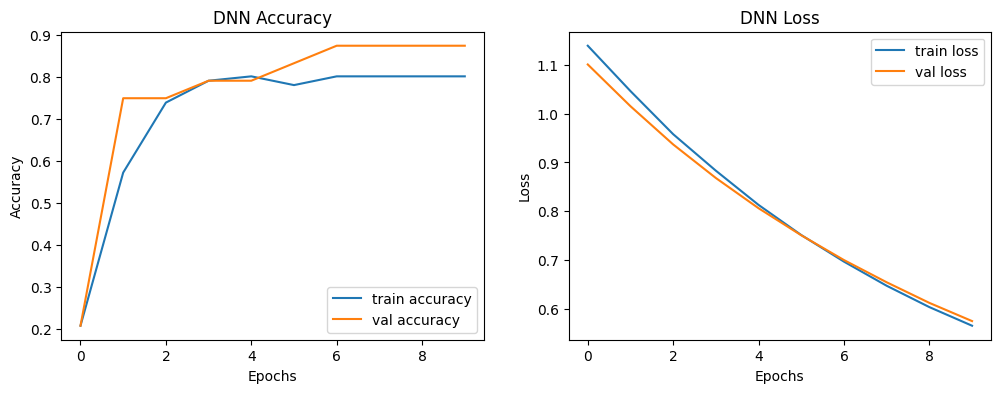

In [7]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_shape = X_train.shape[1]
num_classes = len(set(y))

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('DNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('DNN Loss')

plt.show()

## 2. Convolutional Neural Network (CNN)
### Description
Convolutional Neural Networks are specialized for processing grid-like data, such as images. They use convolutional layers to automatically detect spatial hierarchies in data.

### Type of Data
CNNs are ideal for image data, where spatial relationships between pixels are significant.

### Use Cases
- Image classification (e.g., classifying objects in CIFAR-10 images)
- Object detection and segmentation
- Image generation

### Training Process
Training involves convolving input data with filters, applying activation functions, and pooling operations to reduce dimensionality. The network learns to detect edges, textures, and higher-level patterns.

Epoch 1/10
1563/1563 [==============================] - 26s 15ms/step - loss: 1.4397 - accuracy: 0.4859 - val_loss: 1.2044 - val_accuracy: 0.5762
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0983 - accuracy: 0.6164 - val_loss: 1.0873 - val_accuracy: 0.6205
Epoch 3/10
1563/1563 [==============================] - 2317s 1s/step - loss: 0.9820 - accuracy: 0.6579 - val_loss: 1.0536 - val_accuracy: 0.6368
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8986 - accuracy: 0.6886 - val_loss: 0.9353 - val_accuracy: 0.6764
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8358 - accuracy: 0.7093 - val_loss: 1.0172 - val_accuracy: 0.6556
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.7777 - accuracy: 0.7307 - val_loss: 0.9869 - val_accuracy: 0.6693
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7227 - accuracy: 0.7507 - val_loss: 0.8932 -

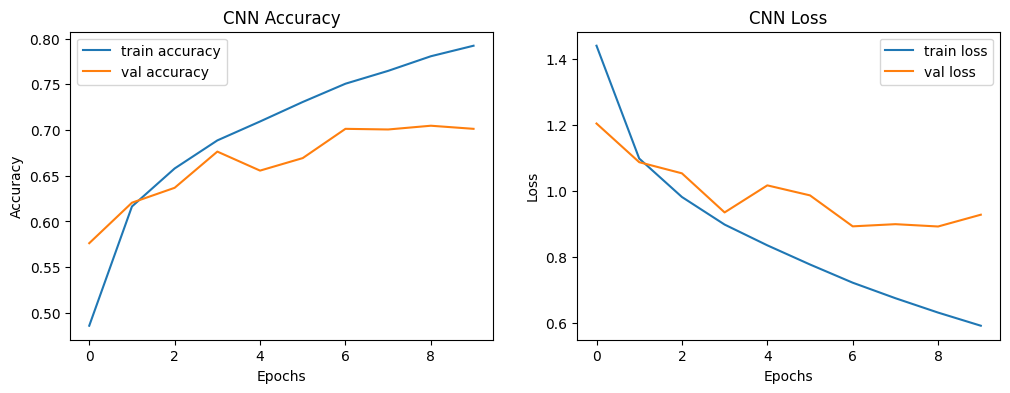

In [8]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

img_height, img_width = X_train.shape[1], X_train.shape[2]
num_classes = len(set(y_train.flatten()))

# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

## 3. Recurrent Neural Network (RNN)
### Description
Recurrent Neural Networks are designed to handle sequential data by maintaining a hidden state that captures information from previous time steps.

### Type of Data
RNNs are suited for sequential data such as time series, text, and any data where order matters.

### Use Cases
- Text generation and classification
- Language translation
- Time series forecasting
### Training Process
RNNs process data one step at a time, updating their hidden state. Training involves backpropagation through time (BPTT) to handle dependencies across different time steps.

Epoch 1/10
625/625 [==============================] - 164s 256ms/step - loss: 0.4473 - accuracy: 0.7901 - val_loss: 0.3385 - val_accuracy: 0.8604
Epoch 2/10
625/625 [==============================] - 162s 258ms/step - loss: 0.2431 - accuracy: 0.9076 - val_loss: 0.3009 - val_accuracy: 0.8766
Epoch 3/10
625/625 [==============================] - 180s 289ms/step - loss: 0.1735 - accuracy: 0.9363 - val_loss: 0.3434 - val_accuracy: 0.8704
Epoch 4/10
625/625 [==============================] - 175s 280ms/step - loss: 0.1377 - accuracy: 0.9495 - val_loss: 0.4002 - val_accuracy: 0.8664
Epoch 5/10
625/625 [==============================] - 160s 256ms/step - loss: 0.1228 - accuracy: 0.9557 - val_loss: 0.4808 - val_accuracy: 0.8034
Epoch 6/10
625/625 [==============================] - 149s 238ms/step - loss: 0.1120 - accuracy: 0.9595 - val_loss: 0.5436 - val_accuracy: 0.8466
Epoch 7/10
625/625 [==============================] - 140s 224ms/step - loss: 0.0605 - accuracy: 0.9790 - val_loss: 0.5737 -

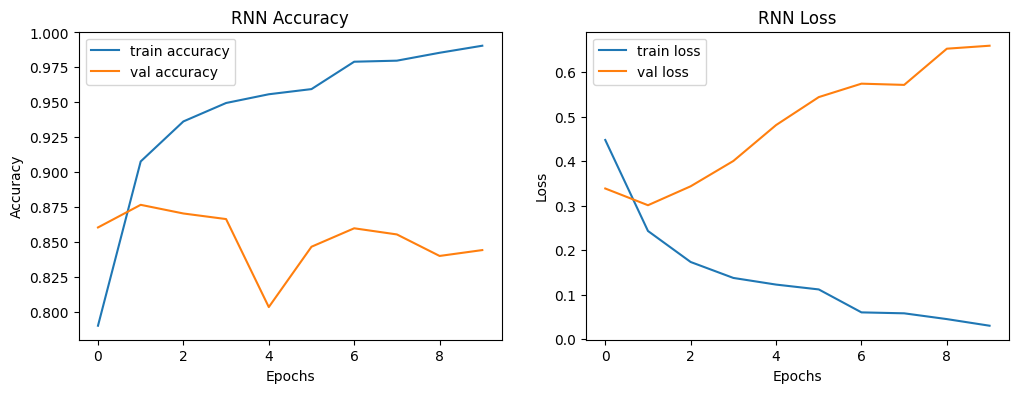

In [9]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load and preprocess the data
vocab_size = 10000
max_length = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

embedding_dim = 32
num_classes = 2  # Binary classification

# Define the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('RNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('RNN Loss')

plt.show()

## 4. Residual Neural Network (ResNet)
### Description
Residual Networks are deep neural networks that include skip connections to prevent the vanishing gradient problem, allowing them to train deeper networks.

### Type of Data
ResNets are typically used for image data, similar to CNNs.

### Use Cases
- Image classification (e.g., CIFAR-10)
- Object detection and segmentation
- Deep feature extraction
### Training Process
ResNets use residual blocks where the input to a block is added to its output, helping gradients flow through the network. Training involves standard convolutional layers and residual connections.

Epoch 1/10
1250/1250 [==============================] - 26s 19ms/step - loss: 1.4976 - accuracy: 0.4509 - val_loss: 1.2050 - val_accuracy: 0.5653
Epoch 2/10
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0796 - accuracy: 0.6178 - val_loss: 1.0300 - val_accuracy: 0.6314
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9021 - accuracy: 0.6841 - val_loss: 0.9646 - val_accuracy: 0.6679
Epoch 4/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.7890 - accuracy: 0.7233 - val_loss: 0.9146 - val_accuracy: 0.6838
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6888 - accuracy: 0.7569 - val_loss: 0.8413 - val_accuracy: 0.7132
Epoch 6/10
1250/1250 [==============================] - 38s 30ms/step - loss: 0.5968 - accuracy: 0.7907 - val_loss: 0.9292 - val_accuracy: 0.6942
Epoch 7/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.5222 - accuracy: 0.8171 - val_loss: 0.9045 -

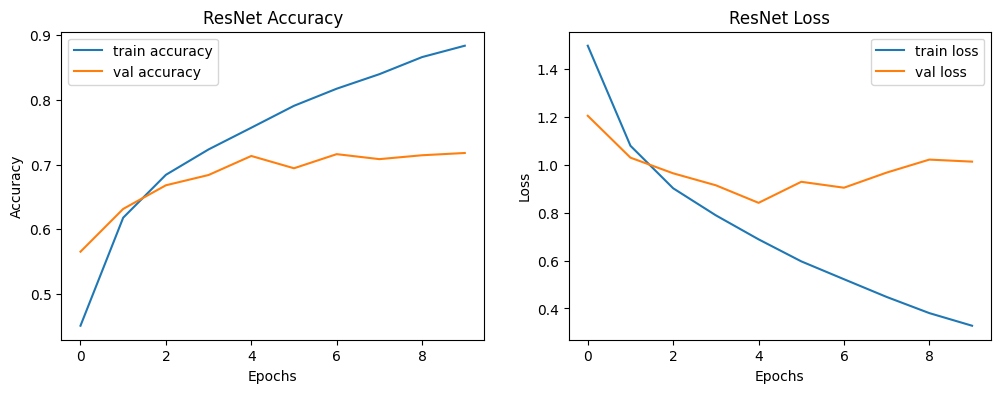

In [10]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load and preprocess the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

input_shape = (32, 32, 3)
num_classes = 10

# Define the model
inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
block_1_output = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(block_1_output)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
block_2_output = Add()([x, block_1_output])

x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(block_2_output)
x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
block_3_output = Add()([x, block_2_output])

x = Flatten()(block_3_output)
x = Dense(64, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet Loss')

plt.show()

## 5. Autoencoders
### Description
Autoencoders are neural networks used for unsupervised learning, particularly for dimensionality reduction and feature learning. They consist of an encoder and a decoder.

### Type of Data
Autoencoders can be used on any type of data but are particularly useful for image data and high-dimensional data.

### Use Cases
- Anomaly detection
- Data compression
- Noise reduction
### Training Process
Training involves learning to encode the input data into a lower-dimensional space and then reconstructing the original data from this encoding. The network is trained to minimize reconstruction error.

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.1632 - accuracy: 0.0106 - val_loss: 0.1244 - val_accuracy: 0.0086
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1145 - accuracy: 0.0110 - val_loss: 0.1089 - val_accuracy: 0.0137
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1041 - accuracy: 0.0117 - val_loss: 0.1016 - val_accuracy: 0.0113
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0988 - accuracy: 0.0116 - val_loss: 0.0978 - val_accuracy: 0.0125
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0958 - accuracy: 0.0117 - val_loss: 0.0954 - val_accuracy: 0.0103
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0936 - accuracy: 0.0121 - val_loss: 0.0933 - val_accuracy: 0.0121
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0920 - accuracy: 0.0125 - val_loss: 0.0927 - val_accuracy:

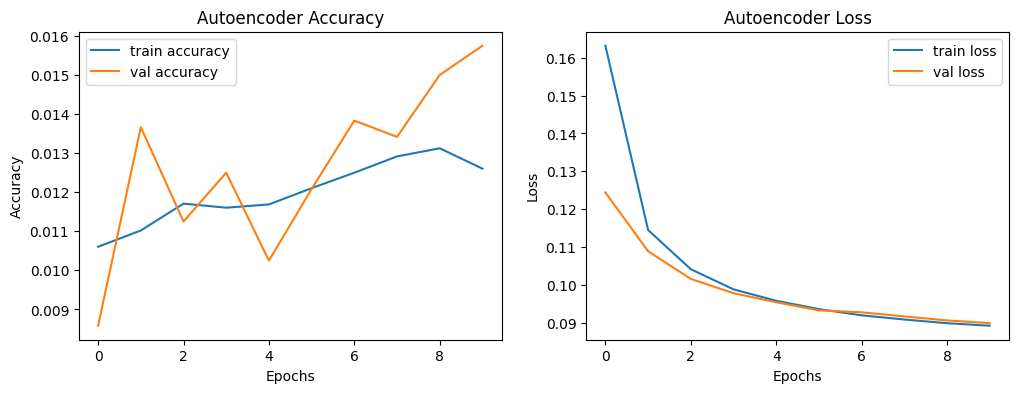

In [11]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the data
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

input_shape = 784

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_shape, activation='sigmoid'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Autoencoder Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Loss')

plt.show()


# 6. Transformers
### Description
Transformers are a type of neural network architecture designed to handle sequential data but without relying on recurrence (unlike RNNs). They use self-attention mechanisms to weigh the influence of different parts of the input data, allowing them to capture long-range dependencies effectively.

### Type of Data
Transformers are used primarily for text and sequential data but have been adapted for other types of data, including images (e.g., Vision Transformers).

### Use Cases
- Natural language processing (NLP) tasks like translation, summarization, and sentiment analysis
- Text generation (e.g., GPT-3, BERT)
- Image classification and generation (Vision Transformers)
### Training Process
Training involves learning attention weights that highlight the importance of different words (or tokens) in a sequence. Transformers are trained using large datasets and optimized using gradient descent methods.

Epoch 1/10
625/625 [==============================] - 135s 212ms/step - loss: 0.4842 - accuracy: 0.7258 - val_loss: 0.2856 - val_accuracy: 0.8866
Epoch 2/10
625/625 [==============================] - 134s 215ms/step - loss: 0.2214 - accuracy: 0.9147 - val_loss: 0.2705 - val_accuracy: 0.8882
Epoch 3/10
625/625 [==============================] - 145s 232ms/step - loss: 0.1640 - accuracy: 0.9417 - val_loss: 0.3489 - val_accuracy: 0.8808
Epoch 4/10
625/625 [==============================] - 133s 212ms/step - loss: 0.1202 - accuracy: 0.9604 - val_loss: 0.3584 - val_accuracy: 0.8792
Epoch 5/10
625/625 [==============================] - 140s 224ms/step - loss: 0.0936 - accuracy: 0.9693 - val_loss: 0.4410 - val_accuracy: 0.8762
Epoch 6/10
625/625 [==============================] - 136s 218ms/step - loss: 0.0719 - accuracy: 0.9785 - val_loss: 0.4862 - val_accuracy: 0.8730
Epoch 7/10
625/625 [==============================] - 134s 215ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.5158 -

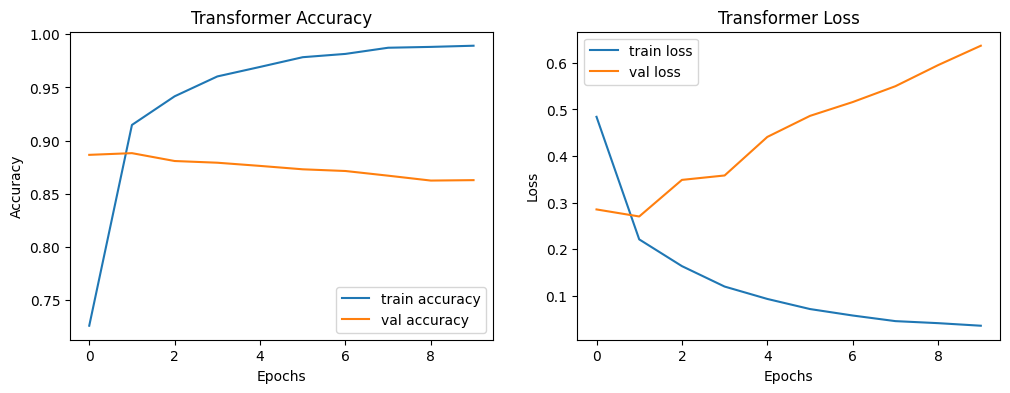

In [12]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load and preprocess the data
vocab_size = 10000
max_length = 500
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Transformer block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define the model
embed_dim = 32
num_heads = 2
ff_dim = 32
num_classes = 2

inputs = tf.keras.Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)(embedding_layer)
x = GlobalAveragePooling1D()(transformer_block)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Transformer Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Transformer Loss')

plt.show()

## 7. Generative Adversarial Networks (GANs)
### Description
Generative Adversarial Networks consist of two neural networks, a generator and a discriminator, that compete against each other. The generator creates data, while the discriminator tries to distinguish between real and generated data.

### Type of Data
GANs are primarily used with image data but can be applied to any data type where generating realistic data is valuable.

### Use Cases
- Image generation
- Data augmentation
- Creative applications (e.g., art and music generation)
### Training Process
The training process alternates between training the discriminator to distinguish real from fake data and training the generator to produce data that can fool the discriminator. This adversarial process helps the generator produce realistic data.

Epoch 0, D Loss: [0.68303615 0.59375   ], G Loss: 1.088450312614441
Epoch 1000, D Loss: [0.23535217 0.9375    ], G Loss: 2.275559902191162
Epoch 2000, D Loss: [0.2267978 0.921875 ], G Loss: 3.704101085662842
Epoch 3000, D Loss: [0.27056358 0.9375    ], G Loss: 4.682991027832031
Epoch 4000, D Loss: [0.27870017 0.875     ], G Loss: 3.583543539047241
Epoch 5000, D Loss: [0.21204053 0.890625  ], G Loss: 4.14129638671875
Epoch 6000, D Loss: [0.27531007 0.875     ], G Loss: 4.151944637298584
Epoch 7000, D Loss: [0.31451304 0.875     ], G Loss: 3.2659339904785156
Epoch 8000, D Loss: [0.21828901 0.9375    ], G Loss: 4.999408721923828
Epoch 9000, D Loss: [0.53150332 0.796875  ], G Loss: 3.772507667541504
Training complete.


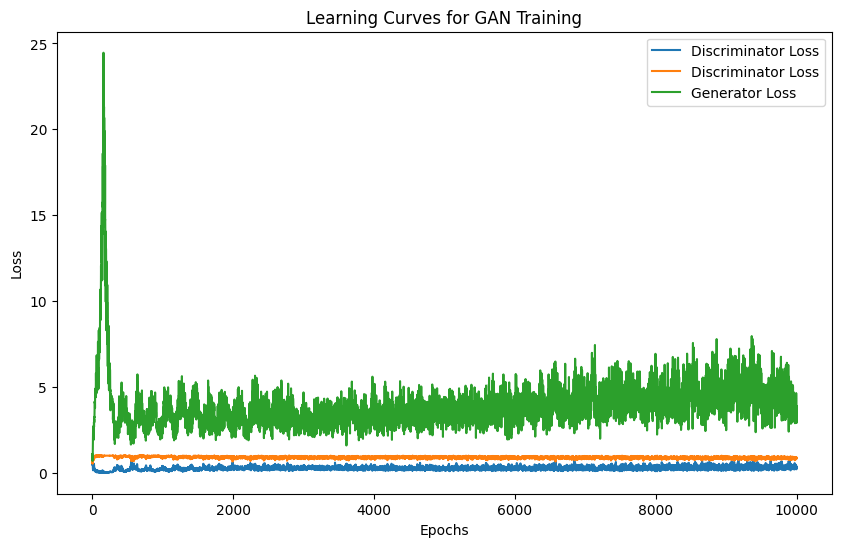

In [14]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import os

# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Load and preprocess the data
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_train = X_train.reshape(-1, 28, 28)  # Ensure the shape is (number of samples, 28, 28)

noise_dim = 100

# Define the generator model
generator = Sequential([
    Dense(128, input_shape=(noise_dim,)),
    LeakyReLU(alpha=0.2),
    Dense(784, activation='tanh'),
    Reshape((28, 28))  # Output shape should be (28, 28)
])

# Define the discriminator model
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combine generator and discriminator to make GAN
discriminator.trainable = False
gan_input = Input(shape=(noise_dim,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)

# Compile GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training GAN
batch_size = 32
epochs = 10000

d_losses = []
g_losses = []

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_images = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    fake_images = generator.predict(noise, verbose=0)  # Suppress verbose output
    
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    
    # Train generator
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    valid_y = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_y)
    
    d_losses.append(0.5 * np.add(d_loss_real, d_loss_fake))
    g_losses.append(g_loss)
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss: {0.5 * np.add(d_loss_real, d_loss_fake)}, G Loss: {g_loss}")

print("Training complete.")

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for GAN Training')
plt.legend()
plt.show()


## 8. Reinforcement Learning (RL)
### Description
Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. The agent takes actions to maximize cumulative rewards over time. Unlike supervised learning, RL does not require labeled input/output pairs and relies on trial and error to discover the best actions.

### Type of Data
- Data Type: Interaction data between the agent and the environment.
- Data Shape: Typically involves state-action-reward sequences, where each sequence represents the state of the environment, the action taken by the agent, and the reward received.
### Use Cases
- Game playing (e.g., AlphaGo, OpenAI's Dota 2 bot)
- Robotics (e.g., robot navigation, manipulation tasks)
- Self-driving cars (e.g., decision-making, path planning)
- Optimization problems (e.g., resource management, traffic control)
### Training Process
1. Initialization: The agent initializes its policy (strategy) and value function (expected reward).
2. Interaction: The agent interacts with the environment by taking actions and observing the resulting state and reward.
3. Policy Update: Based on the observed reward and state transitions, the agent updates its policy to improve future actions.
4. Exploration vs. Exploitation: The agent balances exploration (trying new actions) and exploitation (using known actions that yield high rewards).
The training continues until the agent's performance converges or improves to a satisfactory level.

## 8.1 Environment Setup
1. GridWorld Class: Defines the environment where the agent operates.
2. init Method: Initializes the environment with the given width, height, start position, goal position, and obstacles.
3. reset Method: Resets the agent's position to the start and returns the initial position.
4. step Method: Takes an action and returns the next state, reward, and whether the goal has been reached (done).

In [69]:
import numpy as np

# Grid World Environment
class GridWorld:
    def __init__(self, width, height, start, goal, obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_position = self.start
        return self.agent_position

    def step(self, action):
        x, y = self.agent_position
        if action == 0:  # UP
            next_position = (x, y - 1)
        elif action == 1:  # DOWN
            next_position = (x, y + 1)
        elif action == 2:  # LEFT
            next_position = (x - 1, y)
        elif action == 3:  # RIGHT
            next_position = (x + 1, y)
        
        if (next_position[0] < 0 or next_position[0] >= self.width or
                next_position[1] < 0 or next_position[1] >= self.height or
                next_position in self.obstacles):
            reward = -1
            done = False
            next_position = self.agent_position
        elif next_position == self.goal:
            reward = 1
            done = True
        else:
            reward = 0
            done = False

        self.agent_position = next_position
        return next_position, reward, done


## 8.2 Q-Learning Agent
1. QLearningAgent Class: Defines the Q-Learning agent.
2. init Method: Initializes the agent with state space, action space, epsilon, alpha, and gamma parameters. Also initializes the Q-table.
3. choose_action Method: Chooses an action based on the epsilon-greedy policy.
4. update Method: Updates the Q-table based on the action taken, reward received, and the next state.

In [70]:
class QLearningAgent:
    def __init__(self, state_space, action_space, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.state_space = state_space
        self.action_space = action_space
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = np.zeros(state_space + (action_space,))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_space)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.gamma * self.q_table[next_state][best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.alpha * td_error


## 8.3 Training Loop
1. train_q_learning Function: Trains the Q-Learning agent in the given environment.
2. Loop Over Episodes: Iterates over the specified number of episodes.
3. Loop Over Steps: Iterates over the steps within each episode.
4. Action Selection: Agent selects an action based on the current state.
5. Environment Step: Executes the action in the environment and receives the next state, reward, and done flag.
6. Update Q-Table: Updates the Q-table using the agent's update method.
7. Reward Accumulation: Accumulates the total reward for the episode.
8. Episode Completion: If the goal is reached, the episode ends.
9. Print Progress: Prints progress every 100 episodes.

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def train_q_learning(env, agent, episodes=1000, max_steps_per_episode=200):
    rewards = []
    visited_states = []  # List to store visited states for each episode

    for episode in range(episodes):
        state = env.reset()
        state = tuple(state)
        total_reward = 0
        episode_states = [state]  # List to store visited states for the current episode

        for step in range(max_steps_per_episode):
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            next_state = tuple(next_state)

            agent.update(state, action, reward, next_state)

            state = next_state
            total_reward += reward
            episode_states.append(state)

            if done:
                break

        rewards.append(total_reward)
        visited_states.append(episode_states)

        if episode % 100 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}")

    return rewards, visited_states

## 8.4 Environment and Agent Setup
1. Environment Setup: Defines the width, height, start, goal, and obstacles for the GridWorld.
2. State Space and Action Space: Defines the state space and action space dimensions.
3. Agent Initialization: Initializes the Q-Learning agent with the state space and action space.
4. Training the Agent: Trains the agent for a specified number of episodes.


Episode 0, Total Reward: -14
Episode 100, Total Reward: -10
Episode 200, Total Reward: -8
Episode 300, Total Reward: -12
Episode 400, Total Reward: -9
Episode 500, Total Reward: -10
Episode 600, Total Reward: -6
Episode 700, Total Reward: -10
Episode 800, Total Reward: -6
Episode 900, Total Reward: -8
Episode 1000, Total Reward: -8
Episode 1100, Total Reward: -12
Episode 1200, Total Reward: -9
Episode 1300, Total Reward: -6
Episode 1400, Total Reward: -8
Episode 1500, Total Reward: -9
Episode 1600, Total Reward: -10
Episode 1700, Total Reward: -8
Episode 1800, Total Reward: -9
Episode 1900, Total Reward: -14
Episode 2000, Total Reward: -13
Episode 2100, Total Reward: -13
Episode 2200, Total Reward: -14
Episode 2300, Total Reward: -8
Episode 2400, Total Reward: -7
Episode 2500, Total Reward: -8
Episode 2600, Total Reward: -13
Episode 2700, Total Reward: -16
Episode 2800, Total Reward: -10
Episode 2900, Total Reward: -12
Episode 3000, Total Reward: -13
Episode 3100, Total Reward: -10
Epi

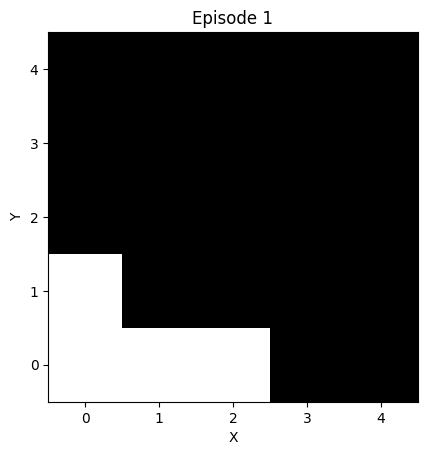

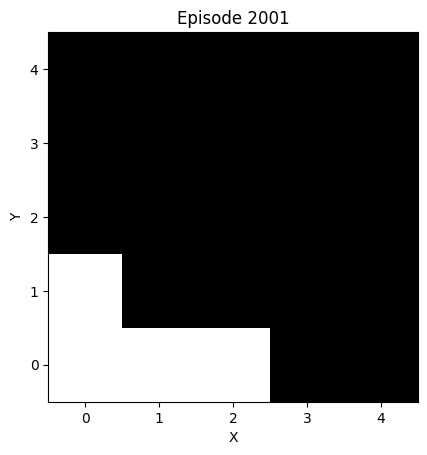

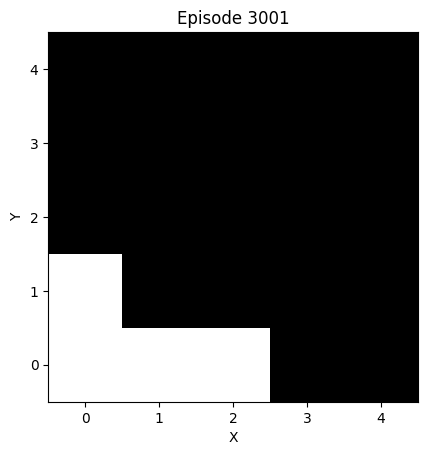

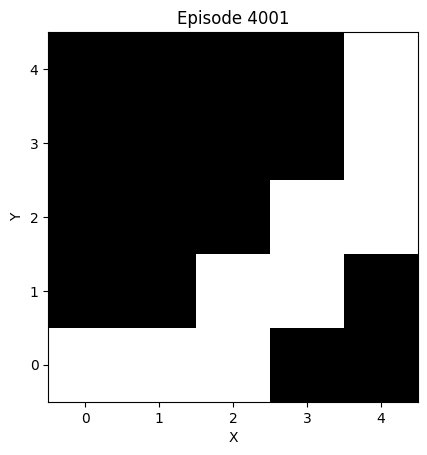

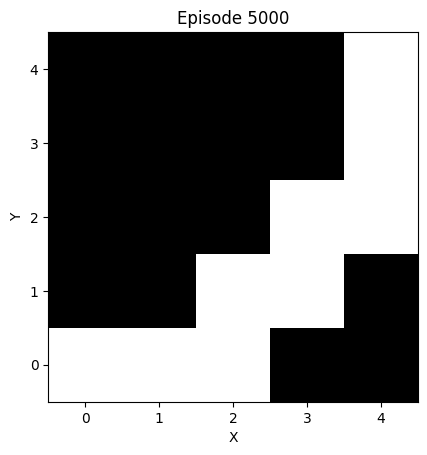

In [75]:
width, height = 5, 5
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 1), (2, 2), (3, 3)]
env = GridWorld(width, height, start, goal, obstacles)

state_space = (width, height)
action_space = 4  # UP, DOWN, LEFT, RIGHT
agent = QLearningAgent(state_space, action_space)

# Train the agent
rewards, visited_states = train_q_learning(env, agent, episodes=5000)

# Visualize the path for selected episodes
episodes_to_visualize = [0, int(len(visited_states) * 2/5), int(len(visited_states) * 3/5),
                         int(len(visited_states) * 4/5), len(visited_states) - 1]

for episode_idx in episodes_to_visualize:
    episode_states = visited_states[episode_idx]
    grid = np.zeros((width, height))

    for state in episode_states:
        x, y = state
        grid[x][y] = 1

    plt.imshow(grid, cmap='gray', origin='lower')
    plt.title(f"Episode {episode_idx + 1}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


### 8.5 Plotting Rewards

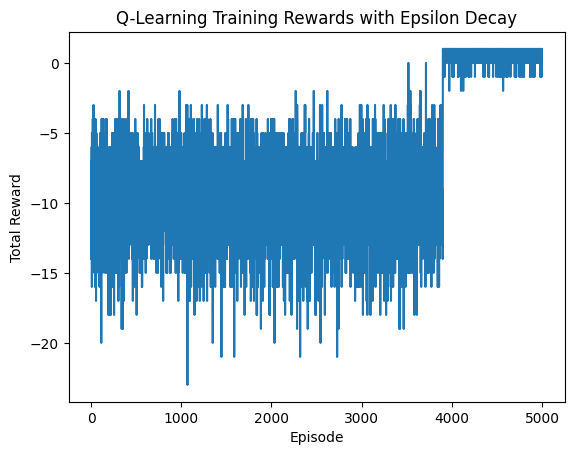

In [76]:
# Plotting Rewards again
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Training Rewards with Epsilon Decay')
plt.show()